In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 

In [5]:
df1=pd.read_csv('n7dryR01.csv')
df2=pd.read_csv('n5dryR01.csv')
df3=pd.read_csv('n3dryR01.csv')
df4=pd.read_csv('n1dryR01.csv')
#df5=pd.read_csv('0dryR01.csv')
df6=pd.read_csv('p1dryR01.csv')
df7=pd.read_csv('p3dryR01.csv')
df8=pd.read_csv('p5dryR01.csv')
df9=pd.read_csv('p7dryR01.csv')

In [6]:
df=pd.concat([df1,df2,df3,df4,df6,df7,df8,df9],axis=0)
df.to_csv('combined_data.csv',index=False)

In [7]:
df['Disp']=df['ScanData']-df['ExpSrfData']
df.head()

,CurveData,ExpSrfData,ScanData,Disp
0,94.000000,100.000000,102.114523,2.114523
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.200000,1.200000
3,93.685168,99.685168,101.119889,1.434722
4,0.000000,0.000000,0.000000,0.000000


In [8]:
disp=np.array(df['Disp'])
disp=disp.reshape(int(disp.size/3),3)
dispdf=pd.DataFrame(disp,columns=['dx','dy','dz'])

c:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


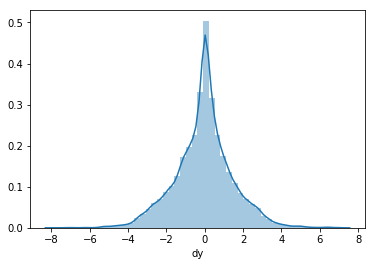

In [9]:
sns.distplot(dispdf['dy'])

In [10]:
x=np.array(df['CurveData'])

In [11]:
y=np.array(df['Disp'])

In [12]:
label_dimension=120

In [14]:
X=x.reshape(int(x.size/label_dimension),label_dimension)
y=y.reshape(int(x.size/label_dimension),label_dimension)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [49]:
scaler=StandardScaler()
scaler.fit(X)
scaledX=scaler.transform(X)
X=scaledX


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)

In [51]:
from tensorflow.contrib.learn import DNNRegressor
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=label_dimension)]
model_dir="D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Dry Disp"

In [52]:
regressor=DNNRegressor(model_dir=model_dir,hidden_units=[100,100],feature_columns=feature_columns,label_dimension=label_dimension)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000001DB2E860>, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_task_type': None, '_save_checkpoints_secs': 600, '_is_chief': True, '_tf_random_seed': None, '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Dry Disp', '_evaluation_master': '', '_master': '', '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_session_config': None}


In [53]:
regressor.fit(X_train,y_train,steps=20000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Sav

INFO:tensorflow:global_step/sec: 50.9395
INFO:tensorflow:loss = 0.107103, step = 6501 (1.963 sec)
INFO:tensorflow:global_step/sec: 50.8359
INFO:tensorflow:loss = 0.106886, step = 6601 (1.967 sec)
INFO:tensorflow:global_step/sec: 52.2709
INFO:tensorflow:loss = 0.106479, step = 6701 (1.913 sec)
INFO:tensorflow:global_step/sec: 51.7301
INFO:tensorflow:loss = 0.107057, step = 6801 (1.933 sec)
INFO:tensorflow:global_step/sec: 50.6557
INFO:tensorflow:loss = 0.107333, step = 6901 (1.974 sec)
INFO:tensorflow:global_step/sec: 51.7301
INFO:tensorflow:loss = 0.106393, step = 7001 (1.933 sec)
INFO:tensorflow:global_step/sec: 50.5532
INFO:tensorflow:loss = 0.105527, step = 7101 (1.978 sec)
INFO:tensorflow:global_step/sec: 51.8643
INFO:tensorflow:loss = 0.105339, step = 7201 (1.928 sec)
INFO:tensorflow:global_step/sec: 50.2484
INFO:tensorflow:loss = 0.105192, step = 7301 (1.990 sec)
INFO:tensorflow:global_step/sec: 51.5966
INFO:tensorflow:loss = 0.104842, step = 7401 (1.938 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 51.6766
INFO:tensorflow:loss = 0.0942646, step = 14801 (1.935 sec)
INFO:tensorflow:global_step/sec: 50.375
INFO:tensorflow:loss = 0.0937848, step = 14901 (1.986 sec)
INFO:tensorflow:global_step/sec: 48.9688
INFO:tensorflow:loss = 0.09402, step = 15001 (2.041 sec)
INFO:tensorflow:global_step/sec: 50.5788
INFO:tensorflow:loss = 0.0935214, step = 15101 (1.977 sec)
INFO:tensorflow:global_step/sec: 50.4767
INFO:tensorflow:loss = 0.0933975, step = 15201 (1.981 sec)
INFO:tensorflow:global_step/sec: 52.8232
INFO:tensorflow:loss = 0.0936613, step = 15301 (1.892 sec)
INFO:tensorflow:global_step/sec: 51.2003
INFO:tensorflow:loss = 0.0945431, step = 15401 (1.954 sec)
INFO:tensorflow:global_step/sec: 52.353
INFO:tensorflow:loss = 0.0936858, step = 15501 (1.910 sec)
INFO:tensorflow:global_step/sec: 50.9915
INFO:tensorflow:loss = 0.0934173, step = 15601 (1.961 sec)
INFO:tensorflow:global_step/sec: 51.8105
INFO:tensorflow:loss = 0.0937664, step = 15701 (1.930 sec)
INFO

DNNRegressor(params={'dropout': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=120, default_value=None, dtype=tf.float32, normalizer=None),), 'hidden_units': [100, 100], 'embedding_lr_multipliers': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x000000001CA14358>, 'input_layer_min_slice_size': None, 'gradient_clip_norm': None, 'optimizer': None, 'activation_fn': <function relu at 0x0000000018727EA0>})

In [54]:
regeval=regressor.evaluate(X_test,y_test,steps=1)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2018-07-06-03:33:43
INFO

In [55]:
regpredict=regressor.predict(X_test,as_iterable=False)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available 

In [56]:
score = metrics.mean_squared_error(regressor.predict(X_test, as_iterable=False), y_test)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available 

In [57]:
score

0.10193077280684824

In [58]:
np.sqrt(metrics.mean_squared_error(y_test,regpredict))

0.31926599068307954

# Predictions

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 
from sklearn.preprocessing import StandardScaler

In [2]:
label_dimension=120
from tensorflow.contrib.learn import DNNRegressor
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=label_dimension)]
#model_dir="D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Dry Disp"
model_dir="Trained Model\\Dry Disp"
regressor=DNNRegressor(model_dir=model_dir,hidden_units=[100,100],feature_columns=feature_columns,label_dimension=label_dimension)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_train_distribute': None, '_save_summary_steps': 100, '_tf_random_seed': None, '_evaluation_master': '', '_keep_checkpoint_max': 5, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_protocol': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000217AA713390>, '_task_id': 0, '_save_checkpoints_steps': None, '_master': '', '_device_fn': None, '_model_dir': 'Trained Model\\Dry Disp', '_task_type': None, '_eval_distribute': None, '_num_ps_replicas': 0, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_repl

In [3]:
dfp=pd.read_csv("oripathdata_jarron10.csv")
Xp=np.array(dfp['CurveData'])
label_dimension=120;
Xp=Xp.reshape(int(Xp.size/label_dimension),label_dimension)
sXp=Xp
scaler2=StandardScaler()
scaler2.fit(sXp)
scaledX2=scaler2.transform(sXp)
sXp=scaledX2

In [4]:
disp=regressor.predict(sXp,as_iterable=False)
disp=disp.reshape(disp.size)
for i in range(2,disp.size,3):
    disp[i]=0
disp=disp.reshape(int(disp.size/label_dimension),label_dimension)    

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available 

In [5]:
new_pred=Xp-disp

In [6]:
preddisp=pd.DataFrame(new_pred)
preddisp.info()
preddisp.to_csv('drypreset_jarron10.csv',index=False, header=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 120 entries, 0 to 119
dtypes: float64(120)
memory usage: 337.6 KB


# Heading

In [18]:
disp=np.array(df['Disp'])
disp=disp.reshape(int(disp.size/3),3)
dispdf=pd.DataFrame(disp,columns=['dx','dy','dz'])

c:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


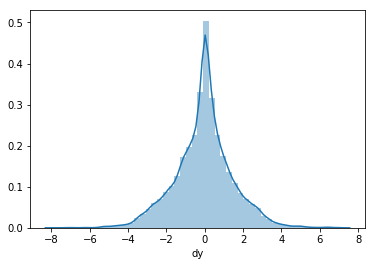

In [21]:
sns.distplot(dispdf['dy'],norm_hist=True)

# Additional Training 

In [27]:
df=pd.read_csv('0dryR01.csv')
df['Disp']=df['ScanData']-df['ExpSrfData']
x=np.array(df['CurveData'])
y=np.array(df['Disp'])
label_dimension=120
X=x.reshape(int(x.size/label_dimension),label_dimension)
y=y.reshape(int(x.size/label_dimension),label_dimension)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler=StandardScaler()
scaler.fit(X)
scaledX=scaler.transform(X)
X=scaledX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)
from tensorflow.contrib.learn import DNNRegressor
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=label_dimension)]
model_dir="D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Dry Disp"
regressor=DNNRegressor(model_dir=model_dir,hidden_units=[100,100],feature_columns=feature_columns,label_dimension=label_dimension)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000000198A0898>, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_task_type': None, '_save_checkpoints_secs': 600, '_is_chief': True, '_tf_random_seed': None, '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Dry Disp', '_evaluation_master': '', '_master': '', '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_session_config': None}


In [28]:
regressor.fit(X_train,y_train,steps=2000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Res

DNNRegressor(params={'dropout': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=120, default_value=None, dtype=tf.float32, normalizer=None),), 'hidden_units': [100, 100], 'embedding_lr_multipliers': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x000000001C833470>, 'input_layer_min_slice_size': None, 'gradient_clip_norm': None, 'optimizer': None, 'activation_fn': <function relu at 0x0000000018727EA0>})

In [29]:
regeval=regressor.evaluate(X_test,y_test,steps=1)
regpredict=regressor.predict(X_test,as_iterable=False)
np.sqrt(metrics.mean_squared_error(y_test,regpredict))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2018-07-06-03:13:54
INFO

0.12263046000782363

In [101]:
g=np.array(df5['ScanData'])

In [103]:
g=g.reshape(int(g.size/120),120)
preddisp=pd.DataFrame(g)
preddisp.info()
preddisp.to_csv('disppred.csv',index=False, header=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 120 entries, 0 to 119
dtypes: float64(120)
memory usage: 337.6 KB


In [122]:
y.shape

(43200,)